In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

In [3]:
X, Y = load_planar_dataset()

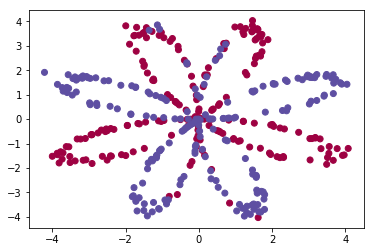

In [4]:
# 시각화
plt.scatter(X[0, :], X[1, :], c=Y[0], cmap=plt.cm.Spectral);

In [5]:
shape_X = X.shape
shape_Y = Y.shape

print(shape_X, shape_Y)

(2, 400) (1, 400)


### Logistic Regression으로 분류

In [6]:
# 결정경계

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

C:\Users\swoos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\swoos\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


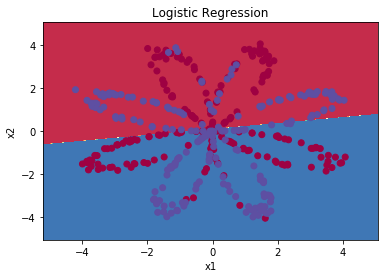

In [103]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

plot_decision_boundary(lambda x: clf.predict(x), X, Y[0])
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [7]:
def sigmoid(x):
    s = 1 / (1+np.exp(-x))
    return s

### Neural Network로 분류하기

##### Layer 사이즈

In [8]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

##### 파라미터 초기화

In [9]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {'W1': W1, 'b1':b1,
                  'W2': W2, 'b2':b2}
    
    return parameters

##### Forward propagation

In [10]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {'Z1':Z1, 'A1':A1,
             'Z2':Z2, 'A2':A2}
    
    return A2, cache

##### Cost 함수 계산

In [11]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1]
    
    cost = - np.sum ( Y * np.log(A2) + (1-Y) * np.log(1-A2) )  / m
    
    return cost

##### Backward propagation

In [12]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dZ1 = np.dot(W2.T, dZ2) * (1-A1**2)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {'dW1':dW1, 'db1':db1,
             'dW2':dW2, 'db2':db2}
    
    return grads

##### Update parameters

In [20]:
def update_parameters(parameters, grads, learning_rate=1.2):
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']
    
    
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    
    parameters = {'W1':W1, "b1":b1,
                  'W2':W2, 'b2':b2}
    
    return parameters

#### 최종 모델

In [21]:
def nn_model(X, Y, n_h, num_iterations= 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print(' %d 번째 Cost : %f' % (i, cost))
            
    return parameters

#### 예측

정방향을 계산한 A2 = Y_hat 값이 0.5보다 크면 1, 아니면 0

In [23]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5) + 0.0
    
    return predictions

#### 신경망의 결정경계

 0 번째 Cost : 0.693162
 1000 번째 Cost : 0.258625
 2000 번째 Cost : 0.239334
 3000 번째 Cost : 0.230802
 4000 번째 Cost : 0.225528
 5000 번째 Cost : 0.221845
 6000 번째 Cost : 0.219094
 7000 번째 Cost : 0.220631
 8000 번째 Cost : 0.219401
 9000 번째 Cost : 0.218483


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

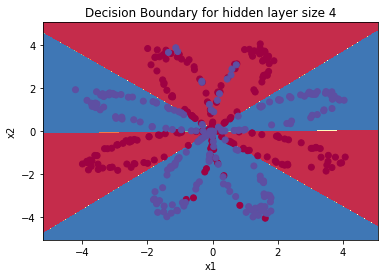

In [32]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size " + str(4))

로지스틱회귀와 비교했을 때 성공적인 분류

In [33]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 91.0 %
Accuracy for 50 hidden units: 90.5 %


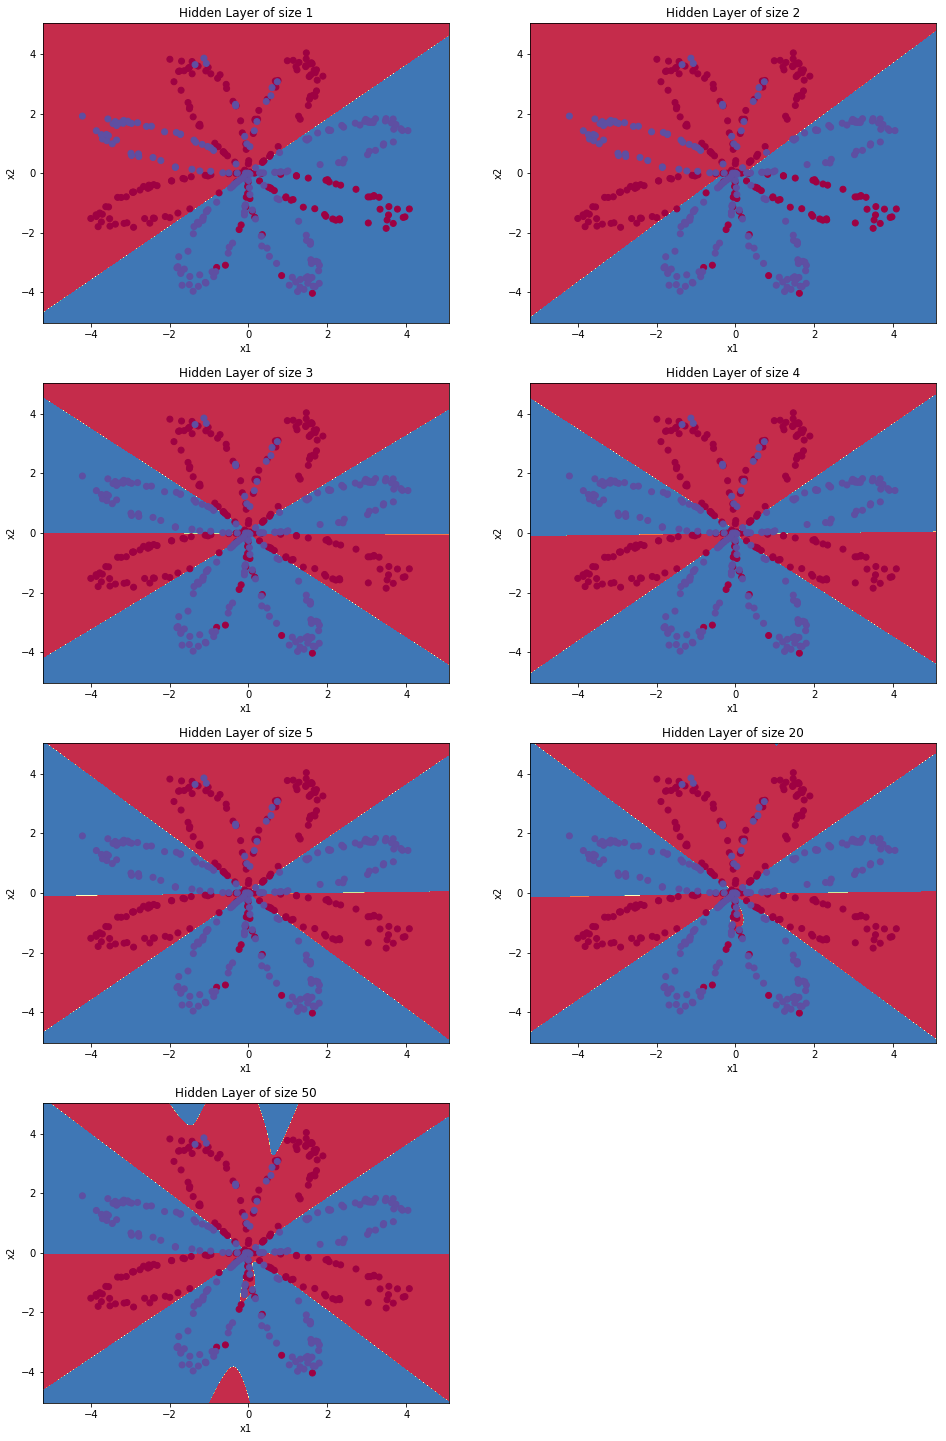

In [34]:
# Hidden unit = 은닉층 노드의 개수에 따라 정확도 차이

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))